# MLP Regressor trained with the California housing dataset

## Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Import the SSL module and configure certificate verification to be optional to avoid SSLCertVerificationError.
import ssl
ssl.SSLContext.verify_mode = ssl.VerifyMode.CERT_OPTIONAL

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load and split the dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# We could scale the features using SciKitLearn's StandardScaler or MinMaxScaler,
# but in this example we will use the Keras Normalization Layer instead.
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
#X_test = scaler.transform(X_test)

In [3]:
# Display the feature names.
# Note that this dataset is not exactly the same as the "housing" dataset used in chapter 2.
# As a result, we cannot completely compare the RMSE of this model with the RMSEs of the
# other models that we trained and tested using the dataset from chapter 2.
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
# Display the number of rows and columns in the features array.

In [5]:
housing.data.shape

(20640, 8)

In [6]:
# Computing the mean median_house_value.
# We can see that the target value have been scaled down by a factor of 100000
# compared to the unprepared Housing dataset that we have used earlier.

In [7]:
housing.target.mean()

2.068558169089147

## Build, compile, train and evaluate a model

In [8]:
# Build a model.
# We don't need to specify an input layer, since we don't need to convert the input array.
# For regression problems, we don't use an activation function in the output layer.

# Keras Normalization Layer. See:
#   https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization
norm_layer = keras.layers.Normalization()

model = keras.models.Sequential([
    norm_layer,
    # hidden layers
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    # output layer
    keras.layers.Dense(1)
])

# Compile the model.
# For regression problems, we use the "mean_squared_error" as loss function.
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=["RootMeanSquaredError"])

# Normalize inputs.
norm_layer.adapt(X_train)

In [9]:
# Train the model.
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - RootMeanSquaredError: 1.7196 - loss: 3.0503 - val_RootMeanSquaredError: 1.0621 - val_loss: 1.1280
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - RootMeanSquaredError: 0.9086 - loss: 0.8268 - val_RootMeanSquaredError: 0.8053 - val_loss: 0.6485
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - RootMeanSquaredError: 0.8196 - loss: 0.6727 - val_RootMeanSquaredError: 0.7453 - val_loss: 0.5555
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - RootMeanSquaredError: 0.7755 - loss: 0.6023 - val_RootMeanSquaredError: 0.7167 - val_loss: 0.5136
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - RootMeanSquaredError: 0.7424 - loss: 0.5520 - val_RootMeanSquaredError: 0.6906 - val_loss: 0.4769
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - RootMeanSquaredError: 0.7152 - loss: 0.5123 - val_RootMeanSquaredError: 0.6654 - val_loss: 0.4428
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - RootMeanSquar

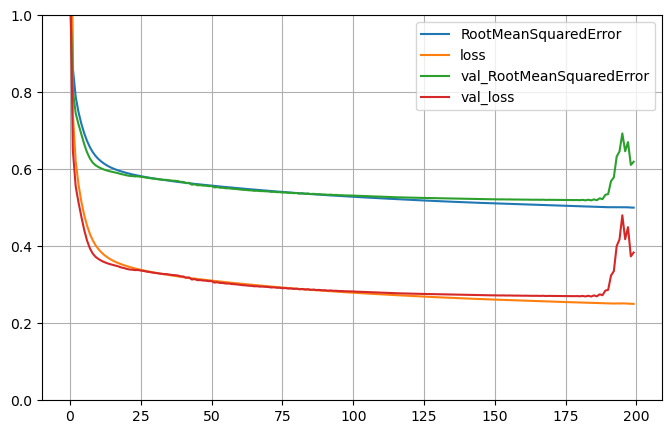

In [10]:
# Show the learning curves.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
# Evaluate the model (outputs the MSE).
loss = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - RootMeanSquaredError: 0.5237 - loss: 0.2745


<b>Observation:</b><br/>
If we multipy the RMSE with 100000, we get the RMSE expressed in USD.

In [12]:
# Make predictions for the first 3 instances in the test set.
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.5197495],
       [1.0258766],
       [4.9480677]], dtype=float32)

In [13]:
# Compare with the corresponding values target values
y_test[:3]

array([0.477  , 0.458  , 5.00001])

<b>Observation:</b><br/>
The second prediction is very bad given the RMSE. The other two predictions are okay.